**Heart Disease Prediction** veri seti, kalp hastalığı riskini tahmin etmek için kullanılan çeşitli sağlık parametrelerini içeriyor

### Kolonların Türkçe Açıklamaları

| Kolon Adı         | Açıklama (Türkçe)                                                                 |
|-------------------|-----------------------------------------------------------------------------------|
| `Age`             | Yaş                                                                               |
| `Sex`             | Cinsiyet (0, 1)                                                                   |
| `ChestPainType`   | Göğüs ağrısı tipi (1, 2, 3, 4)                                                    |
| `BP`              | Dinlenme sırasındaki kan basıncı (mm Hg)                                          |
| `Cholesterol`     | Kolesterol seviyesi (mg/dl)                                                       |
| `FBS over 120`    | Açlık kan şekeri (`1`: >120 mg/dl, `0`: ≤120 mg/dl)                               |
| `EKG results`     | Dinlenme EKG sonucu                                                               |
| `MaxHR`           | Maksimum kalp atış hızı                                                           |
| `ExerciseAngina`  | Egzersizle tetiklenen anjina (0 veya 1)                                           |
| `ST depression`   | ST segmenti depresyonu (EKG'de görülen, egzersiz sonrası)                         |
| `Slope of ST`     | ST segmentinin eğimi (EKG'de egzersiz sonrası ST segmentinin eğim tipi)           |
| `Number of vessels fluro`| Floroskopi ile tespit edilen tıkanmış damar sayısı (0–3 arası)             |
| `ST depression`   | ST segmenti depresyonu (EKG'de görülen, egzersiz sonrası)                         |
| `Thallium`        | Talium stres testi sonucu                                                         |
| `HeartDisease`    | Kalp hastalığı durumu (Var, Yok)                                                  |

### Veri Seti Özeti

- **Toplam Gözlem Sayısı:** 270 satır
- **Toplam Kolon Sayısı:** 14
- **Amaç (Hedef) Değişkeni:** `HeartDisease` — kalp hastalığı olup olmadığını gösterir.
- **Kullanım Alanı:** Makine öğrenmesi modelleriyle kalp hastalığı riskini tahmin etmek.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv


## Veri Setini Yükleme

In [2]:
try:
    heart_disease = '/kaggle/input/heart-disease-prediction/Heart_Disease_Prediction.csv'
    df = pd.read_csv(heart_disease)
    print('Veri seti başarılı bir şekilde yüklendi.')
except FileNotFoundError:
    print('Dosya bulunamadı. Lütfen dosya adını veya dosya yolunu kontrol edin.')
    

Veri seti başarılı bir şekilde yüklendi.


In [3]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [5]:
df.shape

(270, 14)

In [6]:
#veri türlerini, tiplerini, eksik vei olup olmadığını kontrol edelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [7]:
#boş veri olup olmadığını kontrol edelim, her kollona ait null durumu.
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

## Data Cleaning

In [8]:
# Sütun isimlerinde yer alan boşlukları temizleme ve standartlaştırma
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Yeni sütun isimlerini kontrol etme
print("\n--- Temizlenmiş Sütun İsimleri ---")
print(df.columns)


--- Temizlenmiş Sütun İsimleri ---
Index(['age', 'sex', 'chest_pain_type', 'bp', 'cholesterol', 'fbs_over_120',
       'ekg_results', 'max_hr', 'exercise_angina', 'st_depression',
       'slope_of_st', 'number_of_vessels_fluro', 'thallium', 'heart_disease'],
      dtype='object')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int64  
 1   sex                      270 non-null    int64  
 2   chest_pain_type          270 non-null    int64  
 3   bp                       270 non-null    int64  
 4   cholesterol              270 non-null    int64  
 5   fbs_over_120             270 non-null    int64  
 6   ekg_results              270 non-null    int64  
 7   max_hr                   270 non-null    int64  
 8   exercise_angina          270 non-null    int64  
 9   st_depression            270 non-null    float64
 10  slope_of_st              270 non-null    int64  
 11  number_of_vessels_fluro  270 non-null    int64  
 12  thallium                 270 non-null    int64  
 13  heart_disease            270 non-null    object 
dtypes: float64(1), int64(12), 

## Veri Tipi Dönüşümü

In [10]:
#heart_disease sütunu object tipinde. Presence (Var) ve Absence (Yok) gibi değerler içermekte, Bu sütunu ikili (binary) bir sayısal tipe dönüştürmemiz gerekiyor (0 ve 1).

#'heart_disease' sütunundaki benzersiz değerleri kontrol edelim
print("\n--- Heart Disease Sütunundaki Benzersiz Değerler ---")
print(df['heart_disease'].unique())


--- Heart Disease Sütunundaki Benzersiz Değerler ---
['Presence' 'Absence']


In [11]:
# 'heart_disease' sütunundaki değerler 0 ve 1 olarak güncelleyelim (int64 veri tipine dönüştürme)
df['heart_disease'] = df['heart_disease'].map({'Absence': 0, 'Presence': 1})
print("\n'Heart Disease' sütunu sayısal tipe (0 ve 1) dönüştürüldü.")

# 'heart_disease' sütunun data tipini 'int' olarak güncelliyelim
#df['heart_disease'] = df['heart_disease'].astype(int)


'Heart Disease' sütunu sayısal tipe (0 ve 1) dönüştürüldü.


In [12]:
# data tip dönüşümlerimizi yaptık son durumu kontrol edelim.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      270 non-null    int64  
 1   sex                      270 non-null    int64  
 2   chest_pain_type          270 non-null    int64  
 3   bp                       270 non-null    int64  
 4   cholesterol              270 non-null    int64  
 5   fbs_over_120             270 non-null    int64  
 6   ekg_results              270 non-null    int64  
 7   max_hr                   270 non-null    int64  
 8   exercise_angina          270 non-null    int64  
 9   st_depression            270 non-null    float64
 10  slope_of_st              270 non-null    int64  
 11  number_of_vessels_fluro  270 non-null    int64  
 12  thallium                 270 non-null    int64  
 13  heart_disease            270 non-null    int64  
dtypes: float64(1), int64(13)
m

## Keşifsel Veri Analizi (EDA)

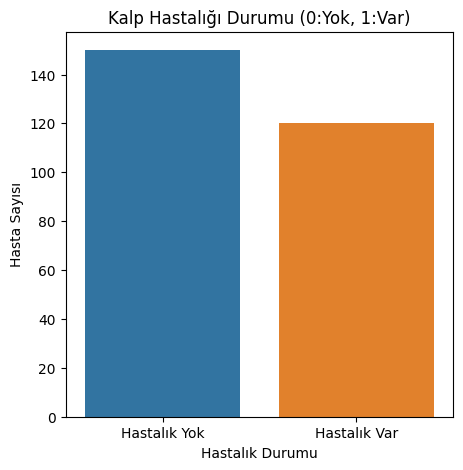


--- Heart Disease (0-1) Sayıları ---
heart_disease
0    150
1    120
Name: count, dtype: int64


In [13]:
#hedef değişkenimiz olan heart_disease sütununun dağılımına görsel olarak bakalım. veri setimizin dengeli olup olmadığını görmüş oluruz.

plt.figure(figsize=(5,5))
sns.countplot(x='heart_disease', data=df)
plt.title('Kalp Hastalığı Durumu (0:Yok, 1:Var)')
plt.xlabel('Hastalık Durumu')
plt.ylabel('Hasta Sayısı')
plt.xticks([0,1], ['Hastalık Yok', 'Hastalık Var'])
plt.show()

# Sayısal değerleri de kontrol edelim. (Toplam 0-1 değerleri)
print('\n--- Heart Disease (0-1) Sayıları ---')
print(df['heart_disease'].value_counts())

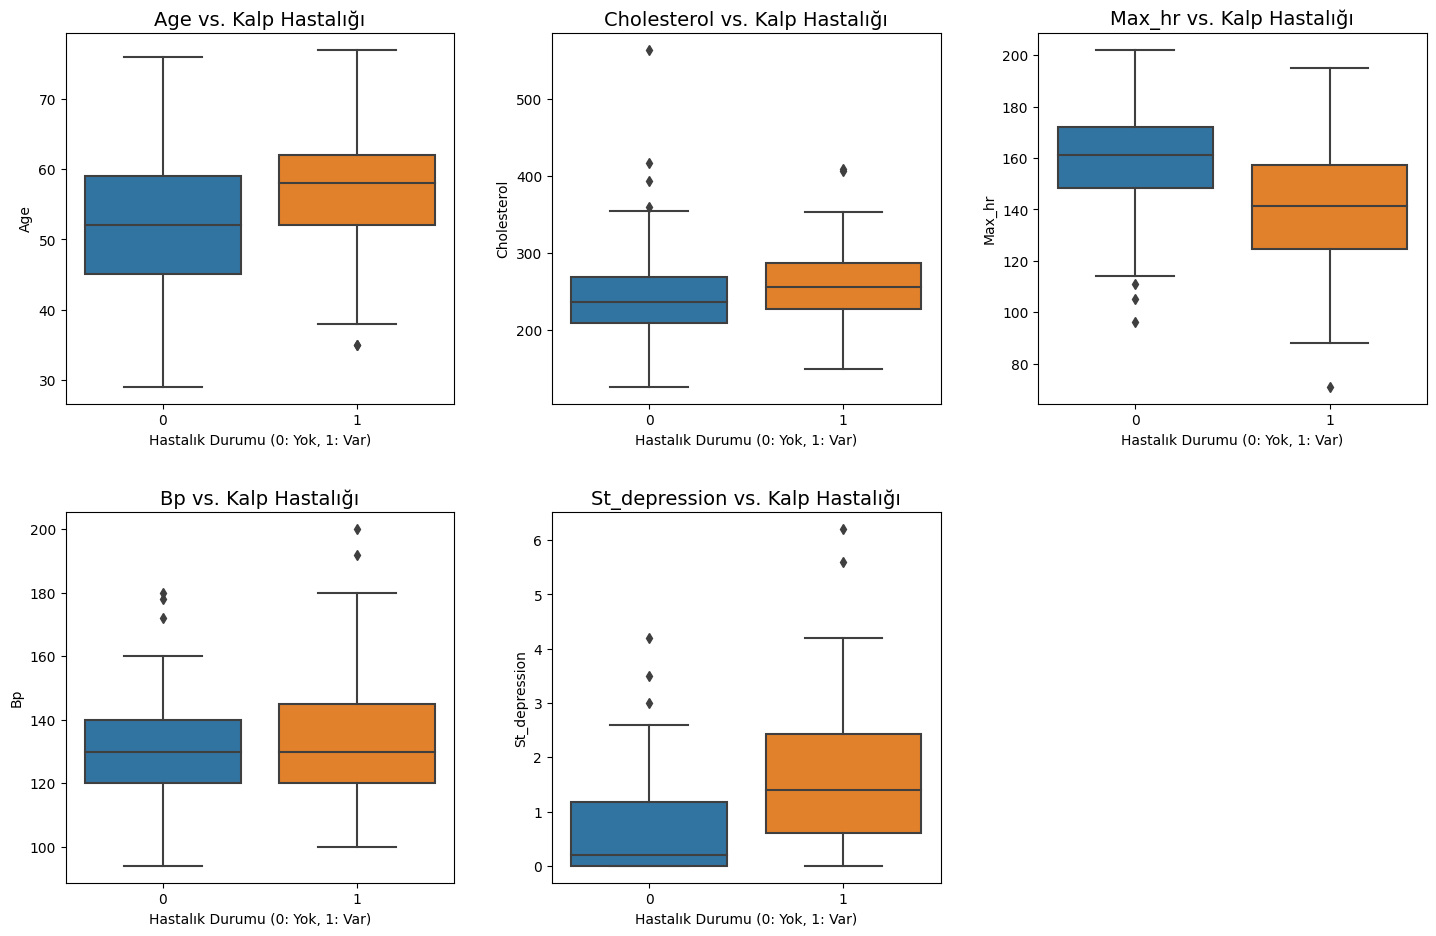

In [14]:
# Analiz edeceğimiz ana sayısal sütunlar
numerical_cols = ['age', 'cholesterol', 'max_hr', 'bp', 'st_depression']

plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1) # 2 satır, 3 sütunlu grafik düzeni oluştur
    sns.boxplot(x='heart_disease', y=col, data=df)
    plt.title(f'{col.capitalize()} vs. Kalp Hastalığı', fontsize=14)
    plt.xlabel('Hastalık Durumu (0: Yok, 1: Var)')
    plt.ylabel(col.capitalize())

plt.tight_layout(pad=3.0) # Grafiklerin birbirine değmesini engeller
plt.show()

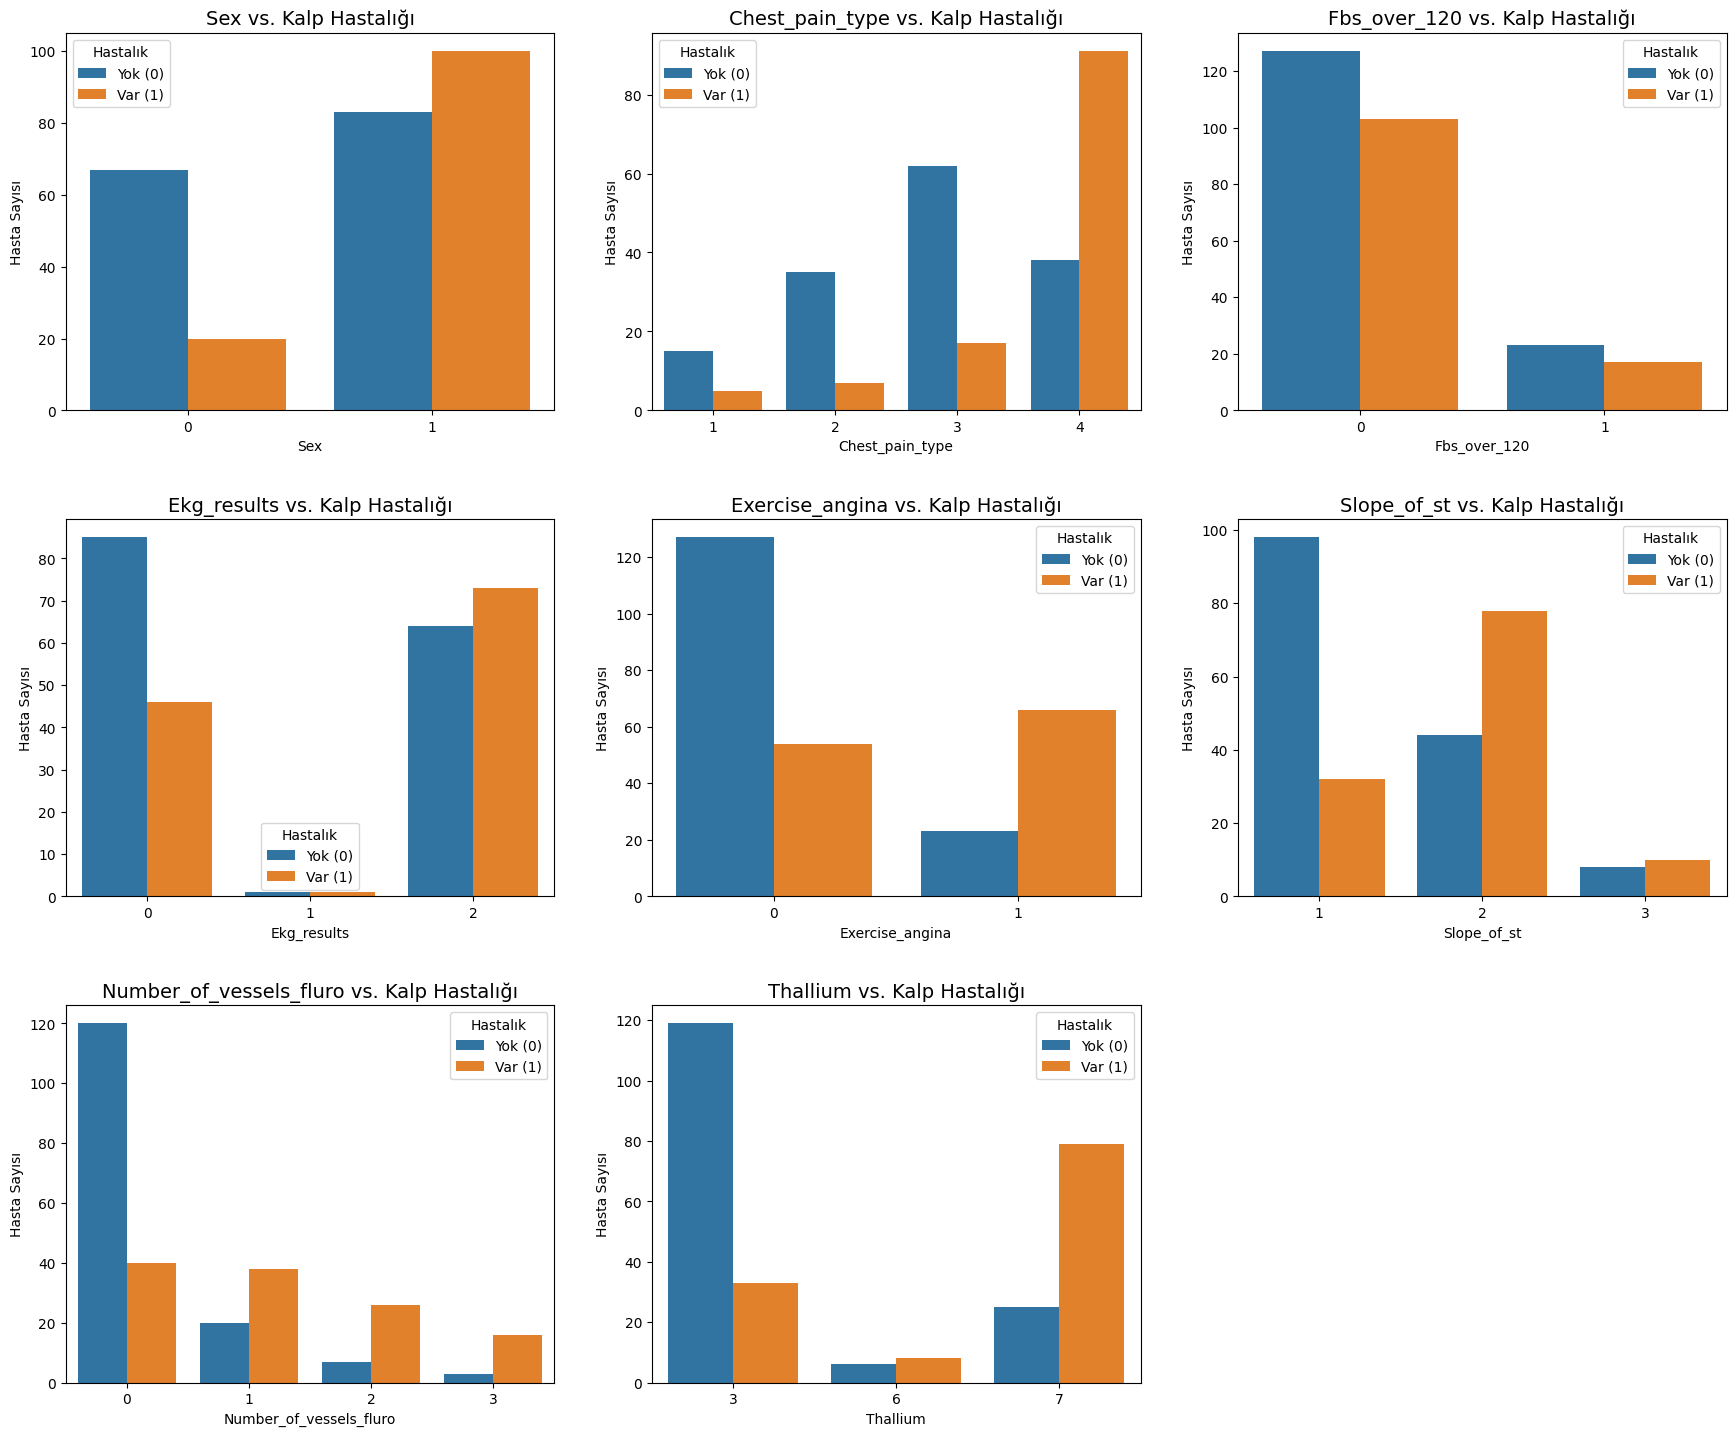

In [15]:
# Analiz edeceğimiz ana kategorik sütunlar
categorical_cols = ['sex', 'chest_pain_type', 'fbs_over_120', 'ekg_results', 'exercise_angina', 'slope_of_st', 'number_of_vessels_fluro', 'thallium']

plt.figure(figsize=(18, 15))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1) # 3 satır, 3 sütunlu grafik düzeni
    
    # 'hue' parametresi ile hedef değişkeni (heart_disease) sınıflara ayırarak çizim yapıyoruz
    sns.countplot(x=col, hue='heart_disease', data=df)
    plt.title(f'{col.capitalize()} vs. Kalp Hastalığı', fontsize=14)
    plt.xlabel(col.capitalize())
    plt.ylabel('Hasta Sayısı')
    plt.legend(title='Hastalık', labels=['Yok (0)', 'Var (1)'])

plt.tight_layout(pad=3.0)
plt.show()

## Özellikleri Ayırma/Kodlama ve Ölçekleme

In [16]:
# Bağımlı değişken (y) ve Bağımsız değişkenler (X)
X = df.drop('heart_disease', axis=1) # 'heart_disease' hariç tüm sütunlar
y = df['heart_disease']

print(f"Bağımsız değişkenler (X): {X.shape}")
print(f"Bağımlı değişken (y): {y.shape}")

Bağımsız değişkenler (X): (270, 13)
Bağımlı değişken (y): (270,)


## Veriyi Eğitim ve Test Setlerine Ayırma

In [17]:
#Modelin gerçek performansı hakkında gerçek bir değerlendirme yapmak için veriyi eğitim ve test setlerine ayıralım

from sklearn.model_selection import train_test_split

# %80 eğitim, %20 test seti
# stratify=y, iki sınıftaki (0 ve 1) oranların eğitim ve test setlerinde korunmasını sağlar.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nEğitim veri boyutu: {X_train.shape[0]} örnek")
print(f"Test veri boyutu: {X_test.shape[0]} örnek")


Eğitim veri boyutu: 216 örnek
Test veri boyutu: 54 örnek


## Modelleme Hazırlığı

-StandardScaler: Sayısal özellikleri ortalaması 0 ve standart sapması 1 olacak şekilde ölçekler. Lojistik Regresyon'un daha hızlı ve stabil çalışmasını sağlar.

-OneHotEncoder: Kategorik özellikleri, modelin anlayabileceği ikili (0 veya 1) sütunlara dönüştürür. Örneğin, sex sütununu sex_0 ve sex_1 olarak iki yeni sütuna ayırır.

-ColumnTransformer: Farklı veri tiplerine (sayısal ve kategorik) aynı anda farklı dönüşümleri uygulamanın en temiz yoludur.

In [18]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sütunları ayırma (EDA aşamasındaki gözlemlerimize dayanarak)
numerical_features = ['age', 'bp', 'cholesterol', 'max_hr', 'st_depression']

categorical_features = ['sex', 'chest_pain_type', 'fbs_over_120', 'ekg_results','exercise_angina', 'slope_of_st', 'number_of_vessels_fluro', 'thallium']


# Ön İşleme (ColumnTransformer) Oluşturma
preprocessor = ColumnTransformer(
    transformers=[
        # Sayısal Özellikler: Standart Ölçekleme (StandardScaler) Uygulama
        ('num', StandardScaler(), numerical_features), 
        
        # Kategorik Özellikler: One-Hot Kodlama (OneHotEncoder) Uygulama
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features)
    ],
    remainder='passthrough' # Diğer sütunları (varsa) olduğu gibi bırak
)

print("Ön İşleme (StandardScaler ve OneHotEncoder) pipeline tanımlandı.")

Ön İşleme (StandardScaler ve OneHotEncoder) pipeline tanımlandı.


## Lojistik Regresyon Modeli Oluşturma ve Eğitme

In [19]:
from sklearn.linear_model import LogisticRegression

# Ön işleme hattı (preprocessor) ve Lojistik Regresyonu birleştirme
model = Pipeline(steps=[('preprocessor', preprocessor),
                              # Lojistik Regresyonu C=1 parametresiyle başlatıyoruz (varsayılan)
                             ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])

# Modeli Eğitme (X_train ve y_train üzerinde)
model.fit(X_train, y_train)

print("Model eğitimi tamamlandı.")

Model eğitimi tamamlandı.


In [20]:
# 1. Sınıf Tahminleri (0 veya 1)
y_pred = model.predict(X_test)

# 2. Olasılık Tahminleri (AUC için gerekli)
# Olasılıkları almak için predict_proba kullanırız. [0 olasılığı, 1 olasılığı] döndürür, biz 1 olasılığını seçeriz.
y_pred_proba = model.predict_proba(X_test)[:, 1]

print(f"\nTest seti üzerinde {len(y_pred)} adet tahmin yapıldı.")


Test seti üzerinde 54 adet tahmin yapıldı.


## Performans Metriklerini Hesaplama

In [21]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix

# Doğruluk (Accuracy) Skoru
acc = accuracy_score(y_test, y_pred)

# ROC AUC Skoru
auc_score = roc_auc_score(y_test, y_pred_proba)

#Confusion Matrix Değeri
con_mat = confusion_matrix(y_test, y_pred)

print("\n--- Model Değerlendirme Sonuçları ---")
print(f"Model Doğruluk (Accuracy) Skoru: {acc:.4f}")
print(f"Model ROC AUC Skoru: {auc_score:.4f}")
print(f"Model Confusion Matrix Değeri:\n {con_mat} ")


# Detaylı Değerlendirme Metrikleri (Hassasiyet, Duyarlılık, F1-Skoru)
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


--- Model Değerlendirme Sonuçları ---
Model Doğruluk (Accuracy) Skoru: 0.8704
Model ROC AUC Skoru: 0.9139
Model Confusion Matrix Değeri:
 [[25  5]
 [ 2 22]] 

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.81      0.92      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54



## Lojistik Regresyon Modelinin Yorumlanması


| Sınıf                | Precision (Kesinlik) | Recall (Duyarlılık) | F1-Score |
|----------------------|----------------------|---------------------|----------|
| `0 (Hastalık Yok)`   | 0.93                 | 0.83                |  0.88    |
| `1 (Hastalık Var)`   | 0.81                 | 0.92                |  0.86    |        

****Genel Performans Metrikleri:****

**Model Doğruluk (Accuracy) Skoru: %87.04**: modelin test setindeki 54 örneğin yaklaşık 46'sını doğru tahmin ettiği anlamına gelir.

**Model ROC AUC Skoru: 0.9139:** AUC değeri 1.0'a ne kadar yakınsa, modelin pozitif ve negatif sınıfları ayırma yeteneği o kadar iyidir. 0.9139 (yaklaşık %91) gibi bir değer, modelimizin iki sınıfı çok güçlü bir şekilde ayırt edebildiğini gösterir.

**Model Confusion Matrix Değeri:**

* Gerçek Pozitif (TP): Model, 22 kişide doğru bir şekilde kalp hastalığı var dedi.
* Gerçek Negatif (TN): Model, 25 kişide doğru bir şekilde kalp hastalığı yok dedi.
* Yanlış Pozitif (FP): Model, aslında sağlıklı olan 5 kişiye yanlışlıkla kalp hastalığı var dedi (Tip I Hata).
* Yanlış Negatif (FN): Model, aslında kalp hastası olan 2 kişiye yanlışlıkla kalp hastalığı yok dedi (Tip II Hata).

**Sınıf 1 (Hastalık Var) için Recall (Duyarlılık) = 0.92:** Modelelimiz, gerçekten hasta olan 24 kişinin %92'sini (yani 22'sini) doğru teşhis etti. Bu, 2 kişiyi gözden kaçırdığı anlamına gelir. Tıbbi uygulamalarda, yanlış negatif (hastalığı kaçırma) hatası çok pahalıya mal olabileceği için yüksek Recall genellikle çok önemlidir.

**Sınıf 0 (Hastalık Yok) için Precision (Kesinlik) = 0.93:** Modelimiz, sağlıklı olduğunu tahmin ettiği kişilerin %93'sinde haklıydı. Yani 5 kişide yanıldı.

**> Özet: Modelimiz, hastaları tespit etme konusunda çok yüksek bir duyarlılığa (Recall=0.92) sahip. Bu, güçlü olduğunu gösterir.**


## Model İyileştirme Ve Kapsamlı Hiperparametre Ayarlama

In [22]:
# StratifiedKFold: Veri setini katmanlı şekilde böler. Her fold’da sınıf dağılımı korunur.
# GridSearchCV: Belirtilen parametre kombinasyonlarını çapraz doğrulama ile dener ve en iyi sonucu bulur.
# scoring='roc_auc': Başarı ölçütü olarak doğruluk kullanalım.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
# preprocessor, X_train ve y_train değişkenlerinin önceki adımlardan hazır olduğunu varsayıyoruz.

# 1. Pipeline'ı kullan: Ön işleme + Sınıflandırıcı
model = Pipeline(steps = [('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42, solver='liblinear'))])

# 2. Parametre ızgarası: C ve penalty'ye odaklanma
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100], 
    'classifier__penalty': ['l1', 'l2'], 
}

# 3. GridSearchCV nesnesini oluşturma
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    estimator = model, # ARTIK PIPELINE KULLANIYORUZ
    param_grid = param_grid,
    scoring = 'roc_auc', # AUC'ye göre en iyi modeli seç
    cv = cv_strategy,
    verbose = 1,
    n_jobs = -1
)

print("\n--- GridSearchCV (Pipeline ile AUC odaklı) Başlatılıyor ---")

# Grid Search'ü eğitim verisi üzerinde çalıştırma
# X_train ve y_train'in eğitim/test ayrımından geldiğini varsayıyoruz.
grid_search.fit(X_train, y_train)

print("GridSearchCV tamamlandı.")


--- GridSearchCV (Pipeline ile AUC odaklı) Başlatılıyor ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
GridSearchCV tamamlandı.


In [23]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# En iyi modeli al (Pipeline nesnesi)
best_model = grid_search.best_estimator_

# En iyi parametreleri ve çapraz doğrulama skorunu yazdırma
print(f"\nEn İyi Parametreler: {grid_search.best_params_}")
print(f"En İyi AUC Skoru : {grid_search.best_score_:.4f}")

# Test seti üzerinde tahmin yapma
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Son performans metrikleri
acc = accuracy_score(y_test, y_pred_tuned)
auc = roc_auc_score(y_test, y_pred_proba_tuned)
con_mat = confusion_matrix(y_test, y_pred)

print("\n--- Model Değerlendirme Sonuçları ---")
print(f"Ayarlanmış Modelin Doğruluk (Accuracy) Skoru: {acc:.4f}")
print(f"Ayarlanmış Modelin ROC AUC Skoru: {auc:.4f}")
print(f"Model Confusion Matrix Değeri:\n {con_mat} ")

# Detaylı Sınıflandırma Raporu
print("\nAyarlanmış Modelin Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_tuned))


En İyi Parametreler: {'classifier__C': 0.1, 'classifier__penalty': 'l2'}
En İyi AUC Skoru : 0.9110

--- Model Değerlendirme Sonuçları ---
Ayarlanmış Modelin Doğruluk (Accuracy) Skoru: 0.8704
Ayarlanmış Modelin ROC AUC Skoru: 0.9250
Model Confusion Matrix Değeri:
 [[25  5]
 [ 2 22]] 

Ayarlanmış Modelin Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88        30
           1       0.81      0.92      0.86        24

    accuracy                           0.87        54
   macro avg       0.87      0.88      0.87        54
weighted avg       0.88      0.87      0.87        54



## Katsayı Analizi

In [24]:
# En iyi modeli Pipeline'dan al
best_model = grid_search.best_estimator_

# 1. Özellik adlarını 'preprocessor' adımından al
feature_names = best_model.named_steps['preprocessor'].get_feature_names_out()

# 2. Katsayıları 'classifier' adımından al
coefficients = best_model.named_steps['classifier'].coef_[0]

# 3. Katsayıları DataFrame'e dönüştürme
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# 4. Mutlak değere göre sıralama (en güçlü etki edenler  olacak şekilde)
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False).drop('Abs_Coefficient', axis=1)

print("\n---Kalp Hastalığı Üzerindeki En Güçlü Etkilerine Göre Özellikler ---")
# İlk 10 özelliği görüntüle
print(coef_df.head(10).to_string(index=False))


---Kalp Hastalığı Üzerindeki En Güçlü Etkilerine Göre Özellikler ---
                       Feature  Coefficient
cat__number_of_vessels_fluro_0    -0.676228
        cat__chest_pain_type_4     0.606150
               cat__thallium_3    -0.474857
               cat__thallium_7     0.434302
                    cat__sex_0    -0.419963
                    cat__sex_1     0.384663
            num__st_depression     0.344496
            cat__slope_of_st_2     0.326062
                   num__max_hr    -0.310558
        cat__exercise_angina_0    -0.288086


## Katsayı Analizi (Görselleştime: Barplot)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daha önce oluşturulan coef_df'yi (Katsayıları içeren DataFrame) kullanıyoruz
# En güçlü 10 özelliği alalım
top_10_features = coef_df.head(10).copy()

# Pozitif veya negatif etkiyi renklendirmek için bir sütun ekleyelim
top_10_features['Influence'] = top_10_features['Coefficient'].apply(lambda x: 'Risk Artırıcı (+)' if x > 0 else 'Risk Azaltıcı (-)')

# Özellik adlarını temizleyelim (görselleştirmeyi kolaylaştırmak için)
top_10_features['Feature'] = top_10_features['Feature'].str.replace('cat__', '').str.replace('num__', '').str.replace('_', ' ').str.title()

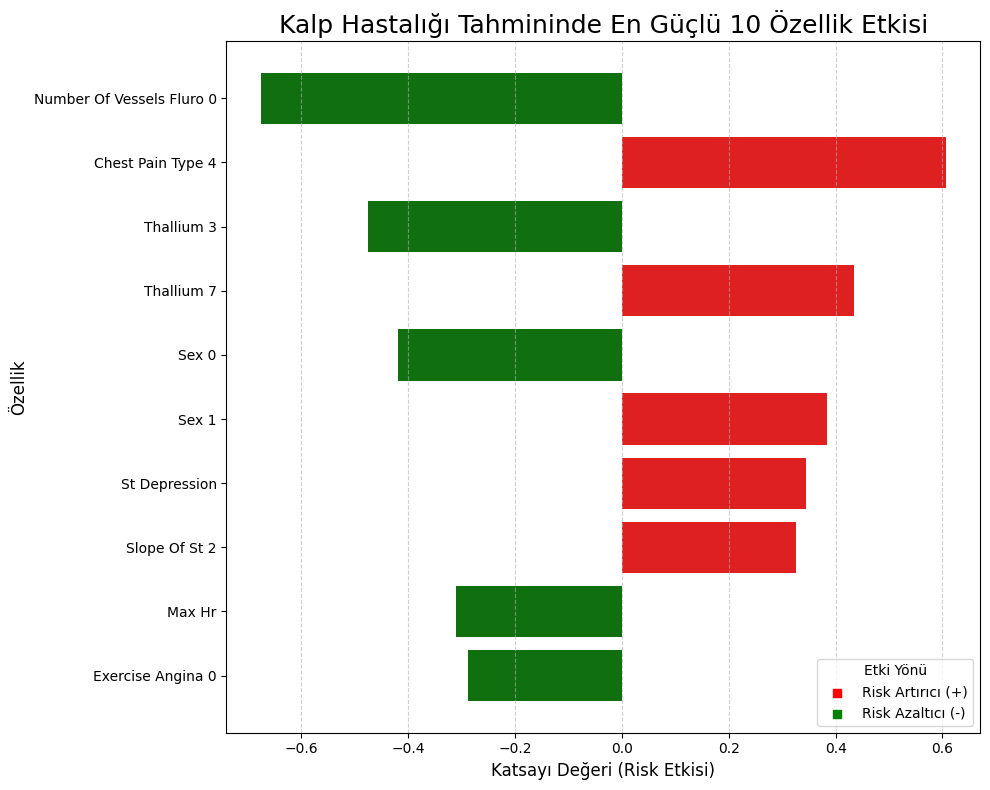

In [26]:
plt.figure(figsize=(10, 8))

# Yatay çubuk grafik (barplot) kullanıyoruz
sns.barplot(x='Coefficient', y='Feature', hue='Influence', data=top_10_features, dodge=False,
            palette={'Risk Artırıcı (+)': 'red', 'Risk Azaltıcı (-)': 'green'})

plt.title('Kalp Hastalığı Tahmininde En Güçlü 10 Özellik Etkisi', fontsize=18)
plt.xlabel('Katsayı Değeri (Risk Etkisi)', fontsize=12)
plt.ylabel('Özellik', fontsize=12)

# Risk etiketlerini manuel olarak ekleyelim
risk_pozitif = plt.scatter([], [], marker='s', color='red', label='Risk Artırıcı (+)')
risk_negatif = plt.scatter([], [], marker='s', color='green', label='Risk Azaltıcı (-)')

plt.legend(handles=[risk_pozitif, risk_negatif], title='Etki Yönü', loc='lower right')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## SONUC (DETAYLI ANALİZ)

* cat__chest_pain_type_4 (+0.606): Göğüs ağrısının 4 tipinde olması, kalp hastalığı riskini önemli ölçüde artırıyor.
 
* cat__thallium_7 (+0.434): Talyum stres testinde 7 değeri, çok güçlü bir risk artırıcıdır.

* num__st_depression (+0.344): ST depresyonundaki artış,riskin yükseldiğini gösteren sayısal bir faktördür.

* cat__sex_1 (+0.385): Cinsiyetin 1 olması (erkek), 0 olmasına göre (kadın) riski faktörünü artırmaktadır.

> **Katsayısı negatif olan özelliklerin varlığı veya değerindeki artış, kalp hastalığı riskini önemli ölçüde AZALTIR:**

* cat__number_of_vessels_fluro_0 (−0.676): Damarlarda tıkanıklık olmaması (fluroskopi sonucu 0), kalp riskini azaltır..

* cat__thallium_3 (−0.475): Talyum testinin normal bir sonuç vermesi, riski ciddi şekilde azaltır.

* cat__sex_0 (−0.420): Cinsiyetin 0 olması (kadın), erkeklere göre riski azaltan bir faktördür.

* num__max_hr (−0.311): Maksimum kalp atış hızının artması, riski azaltan bir sayısal faktördür.

## Yeni Hasta Datası Üzerinden Test

In [27]:
# Yeni hastanın verileri
yeni_hasta = pd.DataFrame({
    'age': [50],
    'sex': [1],
    'chest_pain_type': [1],
    'bp': [120],
    'cholesterol': [230],
    'fbs_over_120': [0],
    'ekg_results': [0],
    'max_hr': [130],
    'exercise_angina': [1],
    'st_depression': [2.0],
    'slope_of_st': [2],
    'number_of_vessels_fluro': [3],
    'thallium': [1]
})

print("Yeni hasta verisi hazırlandı.")

Yeni hasta verisi hazırlandı.


In [28]:
# Tahmini doğrudan Pipeline (best_model) üzerinden yapma 
# eğitilen model, girdiğimiz özelliklere dayanarak hastanın direkt olarak hangi sınıfa ait olduğunu (0 veya 1) söyler.
prediction = best_model.predict(yeni_hasta)

# Tahmin Olasılığını alma (Güven düzeyini görmek için kritik)
# [:, 1] diyerek sadece hastalığın var olma (1) olasılığını alıyoruz
prediction_proba = best_model.predict_proba(yeni_hasta)[:, 1]

# Sonuçları yorumlama
if prediction[0] == 1:
    result = "Kalp Hastalığı Var (Risk Yüksek)"
else:
    result = "Kalp Hastalığı Yok (Risk Düşük)"

print("\n--- Model Tahmini ---")
print(f"Modelin Tahmini: {result}")
print(f"Hastalık Olma Olasılığı: {prediction_proba[0]:.2f} (veya {prediction_proba[0]*100:.1f}%)")


--- Model Tahmini ---
Modelin Tahmini: Kalp Hastalığı Var (Risk Yüksek)
Hastalık Olma Olasılığı: 0.78 (veya 78.3%)


**Bu proje için, makine öğrenmesinde uygulanan adımlar:**

* Veri Hazırlığı ve EDA

* Temel Modelleme (Lojistik Regresyon)

* Gelişmiş Modelleme (Grid Search ve Stratified K-Fold ile İyileştirme)

* Model Yorumlama (Katsayı Analizi)